# Codetech IT Solutions (Tasks)

Task - 1
    ---   SOCIAL MEDIA SENTIMENT ANALYSIS

In [1]:
import pandas as pd

# Load the dataset and sample a smaller subset
df = pd.read_csv('sample.csv', encoding='ISO-8859-1', names=['polarity', 'id', 'date', 'query', 'user', 'text'])

# Sample 10,000 tweets from the dataset
df_sample = df.sample(n=10000, random_state=42)

# Display the first few rows of the sampled dataframe
print(df_sample.head())

        polarity          id                          date     query  \
541200         0  2200003196  Tue Jun 16 18:18:12 PDT 2009  NO_QUERY   
750            0  1467998485  Mon Apr 06 23:11:14 PDT 2009  NO_QUERY   
766711         0  2300048954  Tue Jun 23 13:40:11 PDT 2009  NO_QUERY   
285055         0  1993474027  Mon Jun 01 10:26:07 PDT 2009  NO_QUERY   
705995         0  2256550904  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   

                   user                                               text  
541200  LaLaLindsey0609             @chrishasboobs AHHH I HOPE YOUR OK!!!   
750         sexygrneyes  @misstoriblack cool , i have no tweet apps  fo...  
766711       sammydearr  @TiannaChaos i know  just family drama. its la...  
285055      Lamb_Leanne  School email won't open  and I have geography ...  
705995      yogicerdito                             upper airways problem   


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the sampled tweets
df_sample['cleaned_text'] = df_sample['text'].apply(preprocess_text)
print(df_sample.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


        polarity          id                          date     query  \
541200         0  2200003196  Tue Jun 16 18:18:12 PDT 2009  NO_QUERY   
750            0  1467998485  Mon Apr 06 23:11:14 PDT 2009  NO_QUERY   
766711         0  2300048954  Tue Jun 23 13:40:11 PDT 2009  NO_QUERY   
285055         0  1993474027  Mon Jun 01 10:26:07 PDT 2009  NO_QUERY   
705995         0  2256550904  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   

                   user                                               text  \
541200  LaLaLindsey0609             @chrishasboobs AHHH I HOPE YOUR OK!!!    
750         sexygrneyes  @misstoriblack cool , i have no tweet apps  fo...   
766711       sammydearr  @TiannaChaos i know  just family drama. its la...   
285055      Lamb_Leanne  School email won't open  and I have geography ...   
705995      yogicerdito                             upper airways problem    

                                             cleaned_text  
541200                                

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis
df_sample['sentiment_score'] = df_sample['cleaned_text'].apply(analyze_sentiment)
print(df_sample[['cleaned_text', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             cleaned_text  sentiment_score
541200                                       ahhh hope ok           0.6249
750                                  cool tweet apps razr           0.3182
766711  know family drama lamehey next time u hang kim...          -0.0772
285055  school email wont open geography stuff revise ...          -0.5267
705995                               upper airway problem          -0.4019


In [4]:
# Simulate dates (if real dates are not available) for demonstration
df_sample['created_at'] = pd.date_range(start='1/1/2020', periods=len(df_sample), freq='T')

# Verify columns
print(df_sample.columns)

# Ensure 'created_at' and 'sentiment_score' are present
print(df_sample[['created_at', 'sentiment_score']].head())

# Aggregate sentiment scores by date
daily_sentiment = df_sample.groupby(df_sample['created_at'].dt.date)['sentiment_score'].mean().reset_index()

print(daily_sentiment.head())

Index(['polarity', 'id', 'date', 'query', 'user', 'text', 'cleaned_text',
       'sentiment_score', 'created_at'],
      dtype='object')
                created_at  sentiment_score
541200 2020-01-01 00:00:00           0.6249
750    2020-01-01 00:01:00           0.3182
766711 2020-01-01 00:02:00          -0.0772
285055 2020-01-01 00:03:00          -0.5267
705995 2020-01-01 00:04:00          -0.4019
   created_at  sentiment_score
0  2020-01-01         0.145728
1  2020-01-02         0.148651
2  2020-01-03         0.153590
3  2020-01-04         0.159357
4  2020-01-05         0.147859


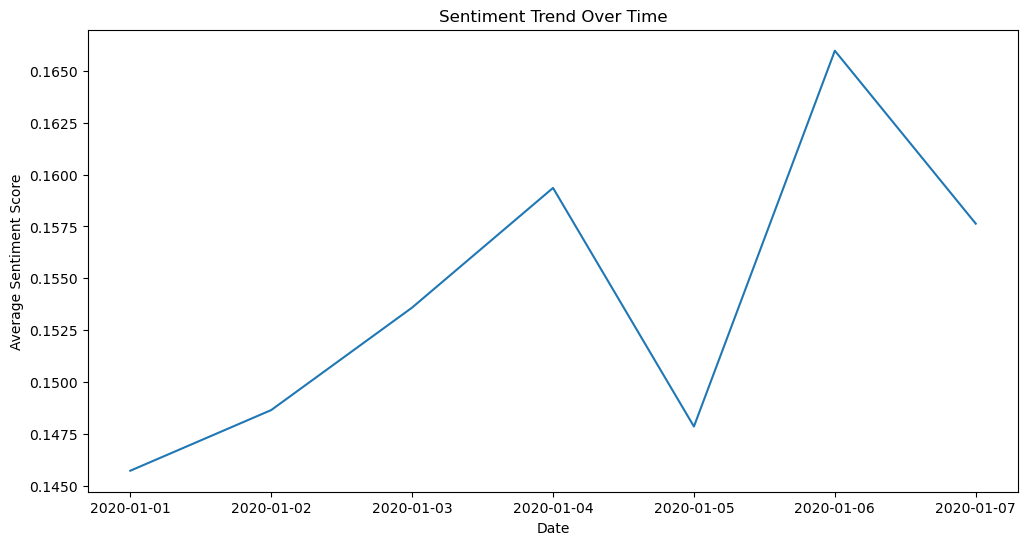

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='created_at', y='sentiment_score')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

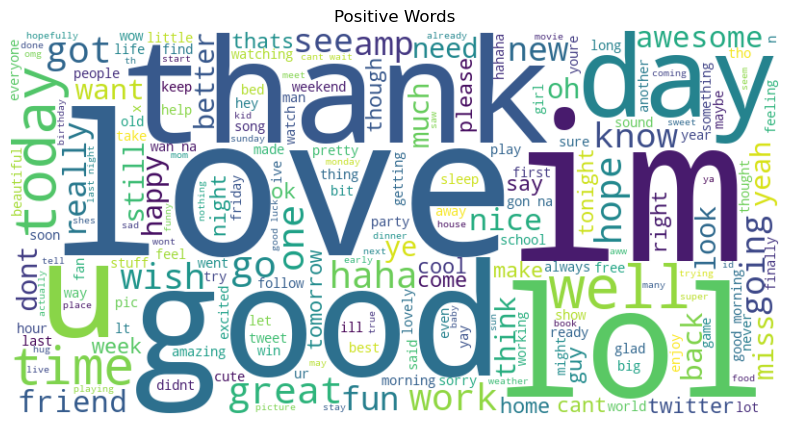

In [6]:
# Create word clouds for positive and negative sentiments
positive_tweets = ' '.join(df_sample[df_sample['sentiment_score'] > 0.1]['cleaned_text'])
negative_tweets = ' '.join(df_sample[df_sample['sentiment_score'] < -0.1]['cleaned_text'])

# Positive word cloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')
plt.show()

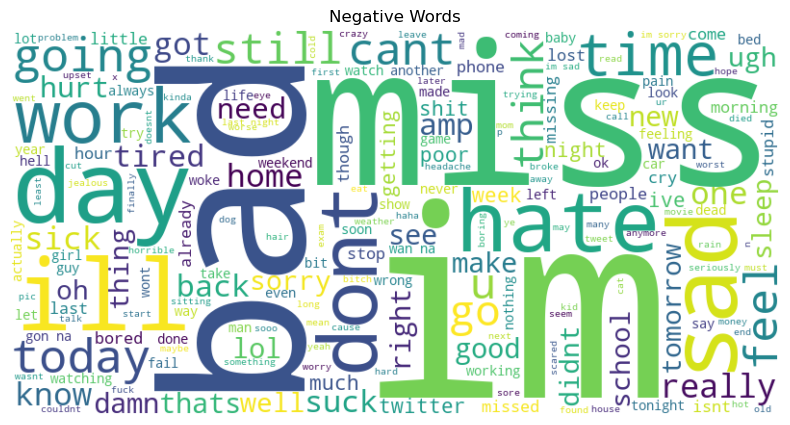

In [7]:
# Negative word cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')
plt.show()